# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 22

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
560,Kelleher,Liverpool,45,2.000000,10,8.614989,5.0,4.307494,4.331484,4.341690,2.030572
12,Martínez,Aston Villa,52,20.188679,107,89.718545,5.3,4.444003,4.155925,4.424274,1.948824
96,Pope,Burnley,55,20.000000,100,89.539458,5.0,4.476973,4.018940,4.757397,1.908988
597,Sánchez,Brighton,44,10.930233,47,42.230218,4.3,3.863616,4.895949,4.184290,1.841907
431,Fabianski,West Ham,51,20.750000,83,85.043018,4.0,4.098459,2.922262,4.082343,1.814828
516,Areola,Fulham,45,20.285714,71,73.988439,3.5,3.647317,3.743251,3.763023,1.719362
383,Lloris,Tottenham,56,21.250000,85,85.999148,4.0,4.047019,3.412718,4.278575,1.710178
252,Alisson,Liverpool,59,18.205128,71,74.803101,3.9,4.108903,4.536869,4.143099,1.691608
8,Leno,Arsenal,50,22.000000,88,83.114377,4.0,3.777926,3.322469,3.616586,1.689540


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
39,Hause,Aston Villa,44,4.000000,28,20.982366,7.0,5.245591,NaN,5.159841,2.500738
277,Cancelo,Manchester City,60,15.862069,92,88.602919,5.8,5.585836,4.688122,5.341093,2.280408
273,Stones,Manchester City,52,12.028986,83,62.393670,6.9,5.186944,4.888374,4.974489,2.274625
123,James,Chelsea,50,15.853659,65,70.360652,4.1,4.438133,4.368205,4.673866,1.984794
75,Bernardo,Brighton,39,2.941176,5,11.498244,1.7,3.909403,2.268822,4.305224,1.979603
109,Rüdiger,Chelsea,45,6.981132,37,29.009007,5.3,4.155344,4.766147,4.379393,1.958848
556,Dias,Manchester City,61,19.019608,97,91.477150,5.1,4.809623,5.602017,4.602438,1.947360
576,Dawson,West Ham,45,7.037037,38,28.232081,5.4,4.011927,4.402262,4.013927,1.891241
5,Cédric,Arsenal,46,5.000000,21,20.060077,4.2,4.012015,4.759034,3.826852,1.870612


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
271,Gündogan,Manchester City,59,15.964912,91,80.245659,5.7,5.026376,4.939730,4.819492,2.069326
302,Fernandes,Manchester Utd,114,21.891892,162,150.687037,7.4,6.883235,6.113249,6.633818,2.038638
272,De Bruyne,Manchester City,118,16.964286,95,117.861401,5.6,6.947619,5.816443,6.577443,2.022530
105,Jorginho,Chelsea,47,13.863636,61,59.832824,4.4,4.315810,4.745671,4.410608,1.990735
24,Saka,Arsenal,54,18.863636,83,86.905380,4.4,4.607032,6.463808,4.492187,1.982551
37,Grealish,Aston Villa,78,20.161290,125,109.194758,6.2,5.416060,4.683241,5.322706,1.939261
449,Soucek,West Ham,54,22.083333,106,93.126835,4.8,4.217064,3.890565,4.244357,1.814735
390,Son,Tottenham,97,21.014493,145,117.966834,6.9,5.613594,4.392242,5.752114,1.802416
203,Harrison,Leeds United,54,20.000000,86,83.012633,4.3,4.150632,4.033499,4.099883,1.786147


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
202,Bamford,Leeds United,66,21.016949,124,116.601749,5.9,5.547986,4.713564,5.426863,2.159551
506,Wilson,Newcastle Utd,68,19.827586,115,104.066312,5.8,5.248562,4.599410,5.197632,2.012732
388,Kane,Tottenham,110,19.066667,143,123.334905,7.5,6.468614,5.433333,6.565094,1.950360
224,Vardy,Leicester City,100,18.125000,116,108.921749,6.4,6.009476,5.000000,5.605823,1.900363
514,Watkins,Aston Villa,63,20.222222,91,96.030875,4.5,4.748780,4.000000,4.649159,1.891959
164,Calvert-Lewin,Everton,76,18.947368,108,93.190875,5.7,4.918407,5.200000,4.617156,1.784094
437,Antonio,West Ham,67,14.000000,63,64.193156,4.5,4.585225,6.758836,4.631597,1.771427
377,Adams,Southampton,58,19.743590,77,81.688593,3.9,4.137474,3.125000,4.099978,1.717993
68,Maupay,Brighton,61,20.000000,74,84.077719,3.7,4.203886,4.100000,4.388899,1.702104


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
301,Lingard,West Ham,60,1.000000,15,7.113771,15.0,7.113771,7.152236,2.904185
272,De Bruyne,Manchester City,118,16.964286,95,117.861401,5.6,6.947619,6.577443,2.022530
302,Fernandes,Manchester Utd,114,21.891892,162,150.687037,7.4,6.883235,6.633818,2.038638
388,Kane,Tottenham,110,19.066667,143,123.334905,7.5,6.468614,6.565094,1.950360
254,Salah,Liverpool,127,21.142857,148,130.301916,7.0,6.162928,5.900540,1.729359
224,Vardy,Leicester City,100,18.125000,116,108.921749,6.4,6.009476,5.605823,1.900363
251,Mané,Liverpool,119,19.074074,103,109.718841,5.4,5.752250,5.500958,1.667494
390,Son,Tottenham,97,21.014493,145,117.966834,6.9,5.613594,5.752114,1.802416
277,Cancelo,Manchester City,60,15.862069,92,88.602919,5.8,5.585836,5.341093,2.280408


In [9]:
metric = 'valuePoints metric'

display(df[minGames & midfielders & (df['now_cost']<63)].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
271,Gündogan,Manchester City,59,15.964912,5.7,5.026376,4.939730,4.485714,4.819492,2.069326
105,Jorginho,Chelsea,47,13.863636,4.4,4.315810,4.745671,4.428603,4.410608,1.990735
24,Saka,Arsenal,54,18.863636,4.4,4.607032,6.463808,4.331491,4.492187,1.982551
449,Soucek,West Ham,54,22.083333,4.8,4.217064,3.890565,4.291599,4.244357,1.814735
203,Harrison,Leeds United,54,20.000000,4.3,4.150632,4.033499,4.523775,4.099883,1.786147
23,Smith Rowe,Arsenal,44,8.095238,4.2,3.679344,2.999680,3.489008,3.601243,1.754058
33,Hourihane,Aston Villa,59,4.000000,5.0,4.223328,NaN,4.191050,4.168783,1.738716
474,Neto,Wolves,57,21.818182,4.4,4.126477,4.312504,4.002306,4.166193,1.728391
69,Trossard,Brighton,57,18.974359,3.9,4.052750,4.213531,4.322231,4.248431,1.697510


In [10]:
metric = 'form 5'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
104,Alonso,Chelsea,56,5.000000,22,18.226721,4.4,3.645344,7.531636,3.876655,1.540439
79,Alzate,Brighton,43,8.928571,25,23.810274,2.8,2.666751,7.348812,2.785082,1.286021
542,Reguilón,Tottenham,56,12.926829,53,49.700672,4.1,3.844769,7.273494,4.097895,1.624711
251,Mané,Liverpool,119,19.074074,103,109.718841,5.4,5.752250,7.105491,5.500958,1.667494
437,Antonio,West Ham,67,14.000000,63,64.193156,4.5,4.585225,6.758836,4.631597,1.771427
568,Telles,Manchester Utd,55,7.096774,22,24.928477,3.1,3.512649,6.703519,3.511273,1.497799
24,Saka,Arsenal,54,18.863636,83,86.905380,4.4,4.607032,6.463808,4.492187,1.982551
302,Fernandes,Manchester Utd,114,21.891892,162,150.687037,7.4,6.883235,6.113249,6.633818,2.038638
481,Pereira,West Brom,57,18.048780,74,60.794731,4.1,3.368357,5.887820,3.386945,1.410849


In [11]:
metric = 'next1_xP'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
388,Kane,Tottenham,110,19.066667,143,123.334905,7.5,6.468614,7.794289,1.950360
301,Lingard,West Ham,60,1.000000,15,7.113771,15.0,7.113771,7.196952,2.904185
302,Fernandes,Manchester Utd,114,21.891892,162,150.687037,7.4,6.883235,6.988278,2.038638
390,Son,Tottenham,97,21.014493,145,117.966834,6.9,5.613594,6.982319,1.802416
272,De Bruyne,Manchester City,118,16.964286,95,117.861401,5.6,6.947619,6.034324,2.022530
202,Bamford,Leeds United,66,21.016949,124,116.601749,5.9,5.547986,5.869952,2.159551
224,Vardy,Leicester City,100,18.125000,116,108.921749,6.4,6.009476,5.453973,1.900363
506,Wilson,Newcastle Utd,68,19.827586,115,104.066312,5.8,5.248562,5.433017,2.012732
37,Grealish,Aston Villa,78,20.161290,125,109.194758,6.2,5.416060,5.339609,1.939261


In [12]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
224,Vardy,Leicester City,100,18.125000,6.4,6.009476,5.453973,1.900363,12.4,2.5,14.9,0.822069
202,Bamford,Leeds United,66,21.016949,5.9,5.547986,5.869952,2.159551,11.6,2.5,14.1,0.670887
254,Salah,Liverpool,127,21.142857,7.0,6.162928,4.762683,1.729359,11.2,3.4,14.6,0.690541
514,Watkins,Aston Villa,63,20.222222,4.5,4.748780,4.635388,1.891959,11.1,2.0,13.1,0.647802
302,Fernandes,Manchester Utd,114,21.891892,7.4,6.883235,6.988278,2.038638,10.4,8.3,18.7,0.854198
164,Calvert-Lewin,Everton,76,18.947368,5.7,4.918407,4.646995,1.784094,9.8,0.8,10.6,0.559444
388,Kane,Tottenham,110,19.066667,7.5,6.468614,7.794289,1.950360,9.7,4.7,14.4,0.755245
68,Maupay,Brighton,61,20.000000,3.7,4.203886,4.381445,1.702104,9.4,1.5,10.9,0.545000
506,Wilson,Newcastle Utd,68,19.827586,5.8,5.248562,5.433017,2.012732,9.4,2.0,11.4,0.574957


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,adjusted points,adjusted points per game,assists,assists_week1,assists_week10,assists_week11,assists_week12,assists_week13,assists_week14,assists_week15,assists_week16,assists_week17,assists_week18,assists_week19,assists_week2,assists_week20,assists_week21,assists_week22,assists_week3,assists_week4,assists_week5,assists_week6,assists_week7,assists_week8,assists_week9,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week10,cleansheet_week11,cleansheet_week12,cleansheet_week13,cleansheet_week14,cleansheet_week15,cleansheet_week16,cleansheet_week17,cleansheet_week18,cleansheet_week19,cleansheet_week2,cleansheet_week20,cleansheet_week21,cleansheet_week22,cleansheet_week3,cleansheet_week4,cleansheet_week5,cleansheet_week6,...,xGA_week7,xGA_week8,xGA_week9,xG_points,xG_week1,xG_week10,xG_week11,xG_week12,xG_week13,xG_week14,xG_week15,xG_week16,xG_week17,xG_week18,xG_week19,xG_week2,xG_week20,xG_week21,xG_week22,xG_week3,xG_week4,xG_week5,xG_week6,xG_week7,xG_week8,xG_week9,xPoints,xPoints week 1,xPoints week 10,xPoints week 11,xPoints week 12,xPoints week 13,xPoints week 14,xPoints week 15,xPoints week 16,xPoints week 17,xPoints week 18,xPoints week 19,xPoints week 2,xPoints week 20,xPoints week 21,xPoints week 22,xPoints week 3,xPoints week 4,xPoints week 5,xPoints week 6,xPoints week 7,xPoints week 8,xPoints week 9,yellow_cards
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
612,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
251,109.718841,5.752250,7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,2.0,NaN,NaN,0.0,NaN,0.0,2.0,0.0,1.0,0.0,8,297,75.0,25.0,6.234811,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4,1.6,1.3,45.0,0.2,0.0,0.5,0.2,0.1,0.4,0.8,0.1,0.2,NaN,0.2,0.9,1.2,NaN,NaN,1.6,NaN,0.9,0.5,0.2,0.0,1.0,NaN,5.948812,1.000000,6.129499,3.182684,3.072532,4.302809,8.97032,3.17032,4.148812,NaN,6.600259,10.167879,14.716215,NaN,NaN,10.601194,NaN,6.672532,7.960167,3.67032,3.658834,7.272532,2
332,21.367892,2.403888,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0,113,100.0,100.0,8.767892,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.2,1.0,1.5,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,2.626279,2.631484,3.504777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.040207,1.730734,NaN,3.471518,2.626279,2.362872,1.0,NaN,NaN,NaN,NaN,1.892521,1


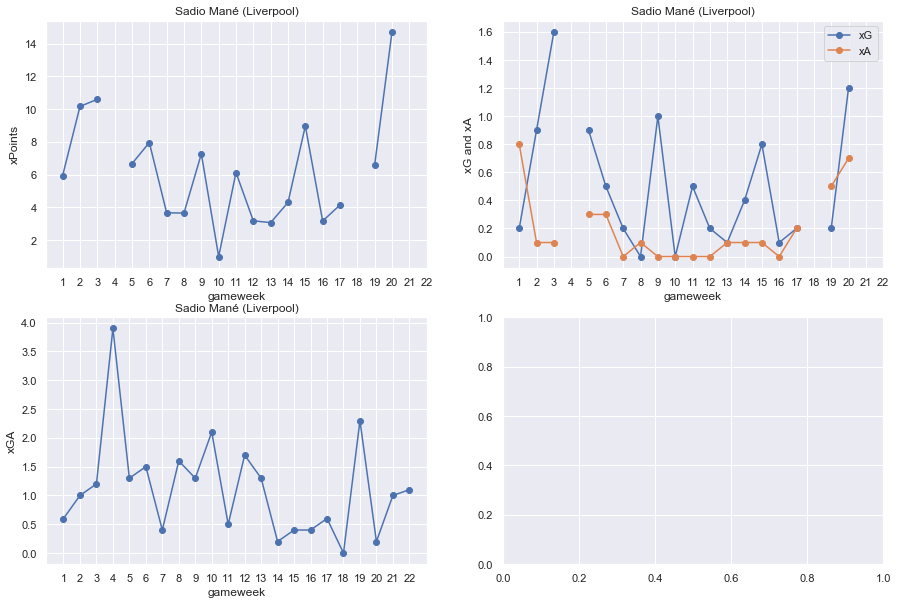

In [14]:
# find player index
name_string = 'Man'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
#ix = playersFound.index[0]
ix = 251

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [15]:
# find player index
df[df['web_name'].str.contains('Antonio')]

,adjusted points,adjusted points per game,assists,assists_week1,assists_week10,assists_week11,assists_week12,assists_week13,assists_week14,assists_week15,assists_week16,assists_week17,assists_week18,assists_week19,assists_week2,assists_week20,assists_week21,assists_week22,assists_week3,assists_week4,assists_week5,assists_week6,assists_week7,assists_week8,assists_week9,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week10,cleansheet_week11,cleansheet_week12,cleansheet_week13,cleansheet_week14,cleansheet_week15,cleansheet_week16,cleansheet_week17,cleansheet_week18,cleansheet_week19,cleansheet_week2,cleansheet_week20,cleansheet_week21,cleansheet_week22,cleansheet_week3,cleansheet_week4,cleansheet_week5,cleansheet_week6,...,xGA_week7,xGA_week8,xGA_week9,xG_points,xG_week1,xG_week10,xG_week11,xG_week12,xG_week13,xG_week14,xG_week15,xG_week16,xG_week17,xG_week18,xG_week19,xG_week2,xG_week20,xG_week21,xG_week22,xG_week3,xG_week4,xG_week5,xG_week6,xG_week7,xG_week8,xG_week9,xPoints,xPoints week 1,xPoints week 10,xPoints week 11,xPoints week 12,xPoints week 13,xPoints week 14,xPoints week 15,xPoints week 16,xPoints week 17,xPoints week 18,xPoints week 19,xPoints week 2,xPoints week 20,xPoints week 21,xPoints week 22,xPoints week 3,xPoints week 4,xPoints week 5,xPoints week 6,xPoints week 7,xPoints week 8,xPoints week 9,yellow_cards
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
437,64.193156,4.585225,3,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,11,181,100.0,100.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.8,1.7,0.6,23.6,0.2,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.8,1.3,1.6,0.2,0.5,0.1,0.3,0.8,0.1,NaN,NaN,NaN,6.095437,2.8,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,14.4,7.2,10.498742,2.8,6.095437,2.7,5.8,4.5,4.4,NaN,NaN,NaN,1


In [16]:
my_starting11 = [12,232,558,277,271,302,37,251,506,202,437]
my_subs = [213,141,200,146]

In [17]:
print('STARTING 11')
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,52,20.188679,5.3,4.444003,4.155925,4.826193,4.540778,4.424274,1.948824
232,Chilwell,Chelsea,60,17.000000,5.0,4.275396,2.722488,3.020429,4.680492,4.508440,1.745423
558,Coufal,West Ham,47,17.894737,3.8,3.987222,3.841324,4.156666,4.197887,3.983375,1.839169
277,Cancelo,Manchester City,60,15.862069,5.8,5.585836,4.688122,5.177532,4.753123,5.341093,2.280408
271,Gündogan,Manchester City,59,15.964912,5.7,5.026376,4.939730,5.485267,4.485714,4.819492,2.069326
302,Fernandes,Manchester Utd,114,21.891892,7.4,6.883235,6.113249,7.228306,6.988278,6.633818,2.038638
37,Grealish,Aston Villa,78,20.161290,6.2,5.416060,4.683241,5.346012,5.339609,5.322706,1.939261
251,Mané,Liverpool,119,19.074074,5.4,5.752250,7.105491,5.622658,4.405516,5.500958,1.667494
506,Wilson,Newcastle Utd,68,19.827586,5.8,5.248562,4.599410,4.550288,5.433017,5.197632,2.012732



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
213,Meslier,Leeds United,47,19.750000,4.0,3.464352,3.783199,3.786387,4.120291,3.576099,1.597986
141,Zaha,Crystal Palace,72,18.888889,5.4,4.575898,2.656659,2.987601,4.975294,4.700814,1.705337
200,Dallas,Leeds United,48,20.750000,4.0,3.015939,3.458996,3.692933,3.779837,3.087072,1.376581
146,Mitchell,Crystal Palace,39,11.034483,2.9,2.753314,3.332263,3.511667,2.466814,2.830565,1.394195


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)